In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 100
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=2, cluster_std=0.5)

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
# using boolean indexing
# X_pos, X_neg = X[y ==1], X[y ==0]
# ax.scatter(X_pos[:,0],X_pos[:,1],color='blue')

plt.show()

In [ ]:
from sklearn.datasets import make_moons

n_samples = 100
X, y = make_moons(n_samples=n_samples, noise=0.2)

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
# using boolean indexing
# X_pos, X_neg = X[y ==1], X[y ==0]
# ax.scatter(X_pos[:,0],X_pos[:,1],color='blue')

plt.show()

In [ ]:
import torch
from torch.utils.data import TensorDataset

n_samples = 100
X, y = make_blobs(n_samples, centers=2, n_features=2, cluster_std=0.7)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))

for X_, y_ in dataset:
    print(type(X_), X_.shape, X_.dtype)

    print(type(y_), y_.shape, y_.dtype)
    break

In [ ]:
from torch.utils.data import DataLoader

n_samples = 100
X, y = make_blobs(n_samples, centers=2, n_features=2, cluster_std=0.7)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
BATCH_SIZE = 8
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)

for X_, y_ in dataloader:
    print(type(X_), X_.shape, X_.dtype)

    print(type(y_), y_.shape, y_.dtype)
    break

In [26]:
n_samples = 100
X, y = make_moons(n_samples=n_samples, noise=0.2)
dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))

BATCH_SIZE = 16
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
for X_, y_ in dataloader:
    print(type(X_), X_.shape, X_.dtype)

    print(type(y_), y_.shape, y_.dtype)
    break

<class 'torch.Tensor'> torch.Size([16, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([16]) torch.float32


## nn.Linear
### - nn.Linear: fully connected layer
### - in_features: 입력 데이터의 차원. 뉴런의 weight개수와 같다
### - out_features: 출력 데이터의 차원, 해당 레이어의 뉴런 갯수와 같다

In [31]:
import torch.nn as nn

# 뉴런 4개, 각 뉴런의 w 8개 & b 1개, 총 파라미터 36개의 레이어 하나 생성
fc = nn.Linear(in_features=8, out_features=4)

print(fc.weight.shape)
print(fc.bias.shape)

torch.Size([4, 8])
torch.Size([4])
Linear(in_features=8, out_features=4, bias=True)


![](/Users/bagjuhyeon/Desktop/"스크린샷 2023-11-17 오전 11.15.22.png") /Users/bagjuhyeon/Desktop

In [32]:
import torch.nn as nn

# 뉴런 4개, 각 뉴런의 w 8개 & b 1개, 총 파라미터 36개의 레이어 하나 생성
test_input = torch.randn(size=(16, 8))
fc = nn.Linear(in_features=8, out_features=4)
test_output = fc(test_input)

print(f"test input: {test_input.shape}")
print(f"test output: {test_output.shape}")

test input: torch.Size([16, 8])
test output: torch.Size([16, 4])


In [43]:
test_input = torch.randn(size=(2, 3))
sigmoid = nn.Sigmoid()
test_output = sigmoid(test_input)

print("===== Test input =====")
print(test_input, "\n")
print("===== nn.sigmoid Output =====")
print(test_output, "\n")
print("===== Manual Computation =====")
print(1 / (1 + torch.exp(-test_input)))

===== Test input =====
tensor([[ 0.0612, -1.2529,  0.1432],
        [ 0.9390,  0.6884,  1.0393]]) 

===== nn.sigmoid Output =====
tensor([[0.5153, 0.2222, 0.5357],
        [0.7189, 0.6656, 0.7387]]) 

===== Manual Computation =====
tensor([[0.5153, 0.2222, 0.5357],
        [0.7189, 0.6656, 0.7387]])


In [42]:
test_pred = torch.tensor([0.7])
test_y = torch.tensor([1.])

loss_function = nn.BCELoss()
test_output = loss_function(test_pred, test_y)

print("===== Test input =====")
print("Pred: ", test_pred)
print("y: ", test_y, "\n")
print("===== nn.BCELoss Output =====")
print(test_output, "\n")
print("===== Manual Computation =====")
print(-(test_y * torch.log(test_pred) + (1 - test_y) * torch.log(1 - test_pred)))

===== Test input =====
Pred:  tensor([0.7000])
y:  tensor([1.]) 

===== nn.BCELoss Output =====
tensor(0.3567) 

===== Manual Computation =====
tensor([0.3567])


# PyTorch Model의 기본 구조

In [44]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

    def forward(self, x):
        pass

## 실습

In [46]:
# 레이어 3개, 초기 input = 10, 최종 Output = 1

# 내 설계
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.layer1 = nn.Linear(in_features=10, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=2)
        self.layer3 = nn.Linear(in_features=2, out_features=1)
        self.sigmoid1 = nn.Sigmoid()
        self.sigmoid2 = nn.Sigmoid()
        self.sigmoid3 = nn.Sigmoid()

    def forward(self, x):
        # 레이어1 forward
        x = self.sigmoid1(self.layer1(x))

        # 레이어2 forward
        x = self.sigmoid2(self.layer2(x))

        # 레이어3 forward, 최종
        pred = self.sigmoid3(self.layer3(x))

        return pred

In [47]:
# 예시 설계
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(in_features=10, out_features=5)
        self.fc1_act = nn.Sigmoid()

        self.fc2 = nn.Linear(in_features=5, out_features=2)
        self.fc2_act = nn.Sigmoid()

        self.fc3 = nn.Linear(in_features=2, out_features=1)
        self.fc3_act = nn.Sigmoid()

    def forward(self, x):
        # 레이어1 forward
        x = self.fc1(x)
        x = self.fc1_act1(x)

        # 레이어2 forward
        x = self.fc2(x)
        x = self.fc2_act(x)

        # 레이어3 forward, 최종
        x = self.fc3(x)
        x = self.fc3_act(x)

        return x


In [127]:
N_SAMPLES = 1000
BATCH_SIZE = 8
X, y = make_blobs(N_SAMPLES, centers=2, n_features=2, cluster_std=0.5)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
data_loader = DataLoader(dataset, batch_size=8)


class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()

        self.fc1 = nn.Linear(in_features=2, out_features=1)  # artificial neuron 1개 (make_blobs로 생성된 데이터는 선형분류 할 수있으므로)
        self.fc1_act = nn.Sigmoid()  # binary classification이므로 sigmoid를 activation function 으로 사용

    def __call__(self, x):
        # 데이터를 인자로 주고 호출시, forward 진행 
        x = self.fc1(x)
        x = self.fc1_act(x)

        x = x.view(-1)  # tensor 를 vector 로 reshape
        return x


In [128]:
from torch.optim import SGD

LR = 0.01

if torch.cuda.is_available():
    DEVICE = 'cuda'
elif torch.backends.mps.is_available():
    DEVICE = 'mps'
else:
    DEVICE = 'cpu'

model = SimpleModel().to(DEVICE)
loss_function = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=LR)

In [129]:
EPOCHS = 10
losses = list()
accs = list()

for epoch in range(EPOCHS):
    epoch_loss = 0.
    epoch_corrects = 0
    for X, y in data_loader:
        X, y = X.to(DEVICE), y.to(DEVICE)

        pred = model(X)
        loss = loss_function(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(len(X))
        # print("loss in batch : ",loss)
        
        epoch_loss += loss.item() * len(X) # batch size의 loss로 변환해 누적 (Tensor 형태의 loss가 scalar 로 전환 되는 과정(?) )
        
        pred = (pred > 0.5).type(torch.float)
        epoch_corrects += (pred == y).sum().item()
    
    epoch_loss /= N_SAMPLES
    losses.append(epoch_loss)
    epoch_accuracy = epoch_corrects / N_SAMPLES
    accs.append(epoch_accuracy)
    
    print(f"Epoch: {epoch + 1}")
    print(f"Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.4f}\n")



Epoch: 1
Loss: 0.0867 - Accuracy: 1.0000
Epoch: 2
Loss: 0.0203 - Accuracy: 1.0000
Epoch: 3
Loss: 0.0119 - Accuracy: 1.0000
Epoch: 4
Loss: 0.0085 - Accuracy: 1.0000
Epoch: 5
Loss: 0.0066 - Accuracy: 1.0000
Epoch: 6
Loss: 0.0054 - Accuracy: 1.0000
Epoch: 7
Loss: 0.0046 - Accuracy: 1.0000
Epoch: 8
Loss: 0.0040 - Accuracy: 1.0000
Epoch: 9
Loss: 0.0035 - Accuracy: 1.0000
Epoch: 10
Loss: 0.0031 - Accuracy: 1.0000


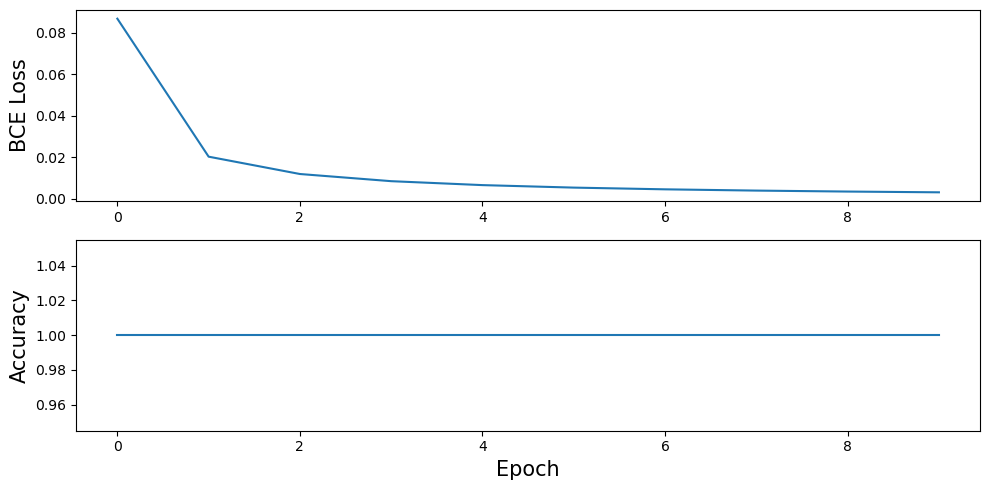

In [130]:
# torch.save(model.state_dict(), "./simple_model_save.h5")
model_scripted = torch.jit.script(model) # TorchScript 형식으로 내보내기
model_scripted.save('./model_scripted2.pt')
fig, axes = plt.subplots(2,1,figsize=(10,5))

axes[0].plot(losses)
axes[1].plot(accs)

axes[1].set_xlabel("Epoch", fontsize=15)
axes[0].set_ylabel("BCE Loss", fontsize=15)
axes[1].set_ylabel("Accuracy", fontsize=15)
axes[0].tick_params(labelsize=10)
axes[1].tick_params(labelsize=10)
fig.tight_layout()
plt.show()